# Import libraries

In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from functions import functions as f
# import model
from sklearn.ensemble import RandomForestClassifier

# Import data

In [102]:
df = pd.read_csv('../data/crashes_cleaned_ohe.csv')

In [103]:
df.head()

,posted_speed_limit,num_units,sex,age,weather_condition_blowing snow,weather_condition_clear,weather_condition_cloudy/overcast,weather_condition_fog/smoke/haze,weather_condition_freezing rain/drizzle,weather_condition_rain,...,crash_month_4,crash_month_5,crash_month_6,crash_month_7,crash_month_8,crash_month_9,crash_month_10,crash_month_11,crash_month_12,serious_accident
0,35,2,1,44.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,25,2,1,71.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15,2,1,60.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,2,1,38.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,2,1,52.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Create Scoring Dataframe

In [104]:
score_df = pd.DataFrame(columns = ['model', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'train_accuracy', 
                            'train_precision', 'train_recall'])

# First Model

## Train-Test Split

In [105]:
X = df.drop(['serious_accident'], axis=1)
y = df.serious_accident

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [106]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Balance the imbalaced data

In [107]:
balance = SMOTE()
X_train_scaled_balanced, y_train_balanced = balance.fit_sample(X_train_scaled, y_train)

## Run Model

In [108]:
random = RandomForestClassifier(n_estimators=100, max_depth=5)  
random.fit(X_train_scaled_balanced, y_train_balanced)

RandomForestClassifier(max_depth=5)

## Predict

In [109]:
predictions_from_X_train = random.predict(X_train_scaled_balanced)
predictions_from_X_test = random.predict(X_test_scaled)

## Scoring

### Train Scoring

Accuracy: 86.6%
Precision: 89.4%
Recall: 83.1%
F1: 86.1%
Conufusion Matrix: 
[[39436  4324]
 [ 7387 36373]]




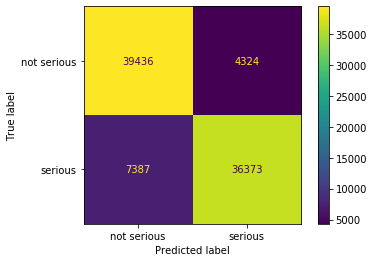

In [110]:
f.scoring(predictions_from_X_train, y_train_balanced, random, X_train_scaled_balanced)

### Test Scoring

Accuracy: 88.6%
Precision: 4.1%
Recall: 21.6%
F1: 6.9%
Conufusion Matrix: 
[[9825 1101]
 [ 171   47]]




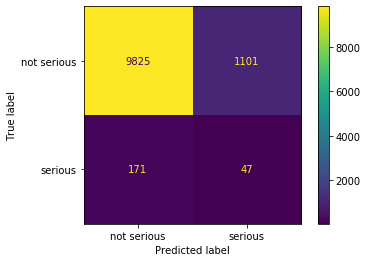

In [111]:
f.scoring(predictions_from_X_test, y_test, random, X_test_scaled)

### Add Scores to Scoring Dataframe

In [112]:
score_df = f.add_scores_to_df("Random1", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Random1,86.619,88.586,89.375,4.094,83.119,21.56,86.134,6.881


#### Check features


In [113]:
import operator
features = {}
cols = X_train.columns.values
for num in range(len(X_train.columns.values)):
    features[cols[num]] = round(random.feature_importances_[num] * 100, 2)
features = dict(sorted(features.items(), key=operator.itemgetter(1),reverse=True))
features = list(features.items())
features[0:15]

[('sex', 21.86),
 ('num_units', 14.33),
 ('posted_speed_limit', 8.61),
 ('crash_day_of_week_5', 5.25),
 ('lighting_condition_darkness, lighted road', 5.22),
 ('crash_day_of_week_6', 4.42),
 ('roadway_surface_cond_dry', 3.66),
 ('crash_day_of_week_7', 3.45),
 ('crash_day_of_week_3', 3.35),
 ('crash_day_of_week_4', 2.98),
 ('crash_day_of_week_1', 2.97),
 ('crash_day_of_week_2', 2.86),
 ('crash_month_2', 2.44),
 ('crash_month_6', 2.3),
 ('roadway_surface_cond_unknown', 1.82)]

# Run Model 2

In [114]:
random2 = RandomForestClassifier(n_estimators=5, max_features=10, max_depth=2)  
random2.fit(X_train_scaled_balanced, y_train_balanced)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

## Predict Model 2

In [115]:
predictions_from_X_train = random2.predict(X_train_scaled_balanced)
predictions_from_X_test = random2.predict(X_test_scaled)

## Scoring 2

### Add Scores to Scoring Dataframe

In [116]:
score_df = f.add_scores_to_df("Random2", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Random1,86.619,88.586,89.375,4.094,83.119,21.56,86.134,6.881
0,Random2,70.086,74.551,72.479,2.812,64.762,35.78,68.404,5.214


#### Check features


In [117]:
import operator
features = {}
cols = X_train.columns.values
for num in range(len(X_train.columns.values)):
    features[cols[num]] = round(random2.feature_importances_[num] * 100, 2)
features = dict(sorted(features.items(), key=operator.itemgetter(1),reverse=True))
features = list(features.items())
features[0:10]

[('lighting_condition_darkness, lighted road', 17.62),
 ('crash_day_of_week_5', 15.83),
 ('num_units', 14.61),
 ('posted_speed_limit', 13.94),
 ('roadway_surface_cond_unknown', 10.15),
 ('crash_month_9', 9.29),
 ('crash_day_of_week_2', 6.28),
 ('crash_month_11', 6.26),
 ('sex', 4.45),
 ('crash_month_6', 0.87)]

# Run Model 3 (grid search)

In [118]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [119]:
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [10, 20, 30]
}

## Variable Tracker

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**

In [120]:
random3 = RandomForestClassifier()

In [121]:
rf_grid_search = GridSearchCV(random3, rf_param_grid, cv=3, scoring='recall')
rf_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing Recall: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Recall: 97.96%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 40}


In [122]:
# rf_grid_search.predict(different data)  - It will know to use the same model with the same params. 

In [123]:
random3 = RandomForestClassifier(criterion='gini', max_depth=30, n_estimators=30)
random3.fit(X_train_scaled_balanced, y_train_balanced)

RandomForestClassifier(max_depth=30, n_estimators=30)

In [124]:
predictions_from_X_train = random3.predict(X_train_scaled_balanced)
predictions_from_X_test = random3.predict(X_test_scaled)

In [125]:
score_df = f.add_scores_to_df("Random3", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Random1,86.619,88.586,89.375,4.094,83.119,21.560,86.134,6.881
0,Random2,70.086,74.551,72.479,2.812,64.762,35.780,68.404,5.214
0,Random3,99.682,97.784,99.982,3.226,99.383,0.459,99.681,0.803


I have a problem with overfitting

# Run Model 4 - F1 

In [126]:
random4 = RandomForestClassifier()

rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [10, 20, 30]
}

rf_grid_search = GridSearchCV(random4, rf_param_grid, cv=3, scoring='f1')
rf_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing F1: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing F1: 98.83%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 40}


Still the same overfitted parameters.

In [127]:
random4 = RandomForestClassifier()

rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100],
    'max_depth': [10]
}

rf_grid_search = GridSearchCV(random4, rf_param_grid, cv=5, scoring='f1')
rf_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing F1: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing F1: 93.13%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


In [128]:
random4 = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=100)
random4.fit(X_train_scaled_balanced, y_train_balanced)

RandomForestClassifier(max_depth=10)

In [129]:
predictions_from_X_train = random4.predict(X_train_scaled_balanced)
predictions_from_X_test = random4.predict(X_test_scaled)

Accuracy: 94.9%
Precision: 3.2%
Recall: 5.5%
F1: 4.1%
Conufusion Matrix: 
[[10567   359]
 [  206    12]]




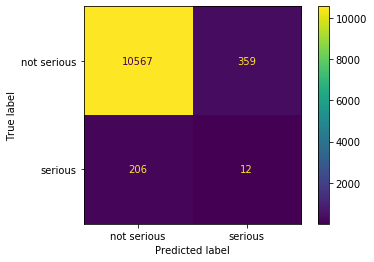

In [130]:
f.scoring(predictions_from_X_test, y_test, random4, X_test_scaled)

Not a good result. Recall is horrible.

In [131]:
score_df = f.add_scores_to_df("Random4", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Random1,86.619,88.586,89.375,4.094,83.119,21.560,86.134,6.881
0,Random2,70.086,74.551,72.479,2.812,64.762,35.780,68.404,5.214
0,Random3,99.682,97.784,99.982,3.226,99.383,0.459,99.681,0.803
0,Random4,93.549,94.930,96.724,3.235,90.151,5.505,93.322,4.075


The model with the least over fitting is Random2, but it's still not great. It had: `n_estimators=5, max_features=10, max_depth=2`. I probably need to keep `max_depth` very shallow. 

`gini` always seems to do better than `entropy`. 

# Model 5

In [132]:
random5 = RandomForestClassifier()

rf_param_grid = {
    'criterion': ['gini'],
    'n_estimators': [10, 20, 30],
    'max_features': [10, 20],
    'max_depth': [2, 5]
}

rf_grid_search = GridSearchCV(random5, rf_param_grid, cv=4, scoring='f1')
rf_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing F1: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing F1: 85.68%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 20, 'n_estimators': 20}


In [133]:
random5 = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=20, max_features=10)
random5.fit(X_train_scaled_balanced, y_train_balanced)

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=20)

In [134]:
predictions_from_X_train = random5.predict(X_train_scaled_balanced)
predictions_from_X_test = random5.predict(X_test_scaled)

Accuracy: 89.1%
Precision: 4.4%
Recall: 22.0%
F1: 7.3%
Conufusion Matrix: 
[[9881 1045]
 [ 170   48]]




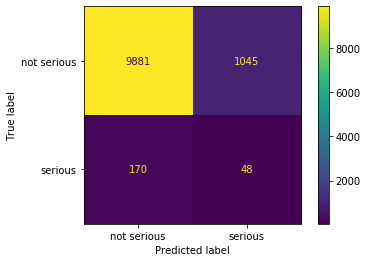

In [135]:
f.scoring(predictions_from_X_test, y_test, random5, X_test_scaled)

I need better recall

In [136]:
score_df = f.add_scores_to_df("Random5", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Random1,86.619,88.586,89.375,4.094,83.119,21.560,86.134,6.881
0,Random2,70.086,74.551,72.479,2.812,64.762,35.780,68.404,5.214
0,Random3,99.682,97.784,99.982,3.226,99.383,0.459,99.681,0.803
0,Random4,93.549,94.930,96.724,3.235,90.151,5.505,93.322,4.075
0,Random5,85.247,89.097,89.632,4.392,79.714,22.018,84.383,7.323


# Model 6

In [137]:
random6 = RandomForestClassifier()

rf_param_grid = {
    'criterion': ['gini'],
    'n_estimators': [10, 20, 30],
    'max_features': [10, 20],
    'max_depth': [2, 5]
}

rf_grid_search = GridSearchCV(random6, rf_param_grid, cv=4, scoring='recall')
rf_grid_search.fit(X_train_scaled_balanced, y_train_balanced)

print(f"Testing Recall: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Recall: 81.58%

Optimal Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'n_estimators': 30}


In [138]:
random6 = RandomForestClassifier(criterion='gini', max_depth=5, max_features=10, n_estimators=30)
random6.fit(X_train_scaled_balanced, y_train_balanced)

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=30)

In [139]:
predictions_from_X_train = random6.predict(X_train_scaled_balanced)
predictions_from_X_test = random6.predict(X_test_scaled)

Accuracy: 84.7%
Precision: 3.1%
Recall: 22.9%
F1: 5.5%
Conufusion Matrix: 
[[9385 1541]
 [ 168   50]]




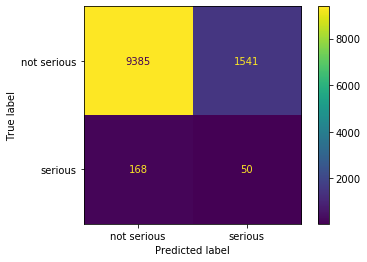

In [140]:
f.scoring(predictions_from_X_test, y_test, random6, X_test_scaled)

I need better recall

In [141]:
score_df = f.add_scores_to_df("Random6", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,Random1,86.619,88.586,89.375,4.094,83.119,21.560,86.134,6.881
0,Random2,70.086,74.551,72.479,2.812,64.762,35.780,68.404,5.214
0,Random3,99.682,97.784,99.982,3.226,99.383,0.459,99.681,0.803
0,Random4,93.549,94.930,96.724,3.235,90.151,5.505,93.322,4.075
0,Random5,85.247,89.097,89.632,4.392,79.714,22.018,84.383,7.323
0,Random6,84.761,84.664,85.515,3.143,83.700,22.936,84.598,5.528


# Back to Model 2

In [142]:
random2

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [143]:
random2.feature_importances_

array([0.13940951, 0.1460729 , 0.04452878, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00709001,
       0.17615241, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1015036 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06278663, 0.        , 0.        ,
       0.15830312, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00868183, 0.        ,
       0.        , 0.0928812 , 0.        , 0.06259002, 0.     

In [144]:
import operator
features = {}
cols = X_train.columns.values
for num in range(len(X_train.columns.values)):
    features[cols[num]] = round(random2.feature_importances_[num] * 100, 2)
features = dict(sorted(features.items(), key=operator.itemgetter(1),reverse=True))
features = list(features.items())
features[0:15]

[('lighting_condition_darkness, lighted road', 17.62),
 ('crash_day_of_week_5', 15.83),
 ('num_units', 14.61),
 ('posted_speed_limit', 13.94),
 ('roadway_surface_cond_unknown', 10.15),
 ('crash_month_9', 9.29),
 ('crash_day_of_week_2', 6.28),
 ('crash_month_11', 6.26),
 ('sex', 4.45),
 ('crash_month_6', 0.87),
 ('lighting_condition_darkness', 0.71),
 ('age', 0.0),
 ('weather_condition_blowing snow', 0.0),
 ('weather_condition_clear', 0.0),
 ('weather_condition_cloudy/overcast', 0.0)]

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**